# Indice:

- [0- Introduccion](#0--Introduccion)
- [1- Importar librerias necesarias](#1--Importar-librerias-necesarias)
    - [1.1- Importar datasets de archivos del repositorio](#11--Importar-datasets-de-archivos-del-repositorio)
- [2- Seleccion de empresa dentro del IBEX-35](#2--Seleccion-de-empresa-dentro-del-IBEX-35)
    - [2.1- Dataset de empresa individual](#21--Dataset-de-empresa-individual)
- [3- Analisis individual de la empresa](#3--Analisis-individual-de-la-empresa)
    - [3.1- Evolucion del precio de cierre de las acciones de la empresa en el periodo 2019-2024](#31--Evolucion-del-precio-de-cierre-de-las-acciones-de-la-empresa-en-el-periodo-2019-2024)
        - [3.1.1- Evolucion entre Open y Close en la cotizacion de acciones de ACS (en EUR) entre 01/01/2019 a 30/04/2024](#311--Evolucion-entre-Open-y-Close-en-la-cotizacion-de-acciones-de-ACS-en-EUR-entre-01012019-a-30042024)
    - [3.2- Analisis de estadistica descriptiva acerca de la empresa](#32--Analisis-de-estadistica-descriptiva-acerca-de-la-empresa)
        - [3.2.1- Variaciones a lo largo del periodo 2019 a 2024 entre Open y Close](#321--Variaciones-a-lo-largo-del-periodo-2019-a-2024-entre-Open-y-Close)
        - [3.2.2- Conceptos estadisticos en el analisis de datos de Close de la empresa entre 2019 y 2024](#322--Conceptos-estadisticos-en-el-analisis-de-datos-de-Close-de-la-empresa-entre-2019-y-2024)
        - [3.2.3- Analisis multivariables de las cotizaciones de la empresa](#323--Analisis-multivariables-de-las-cotizaciones-de-la-empresa)
    - [3.3- Variaciones importantes de precios dentro de los años 2019 a 2024 de la empresa a analizar](#33--Variaciones-importantes-de-precios-dentro-de-los-años-2019-a-2024-de-la-empresa-a-analizar)
        - [3.3.1- Mayores incrementos de precio de cierre por mes de cada año](#331--Mayores-incrementos-de-precio-de-cierre-por-mes-de-cada-año)
        - [3.3.2- Mayores 5 incrementos de precio de cierre de cada año](#332--Mayores-5-incrementos-de-precio-de-cierre-de-cada-año)
        - [3.3.3- Mayores disminuciones de precio de cierre por mes de cada año](#333--Mayores-disminuciones-de-precio-de-cierre-por-mes-de-cada-año)
        - [3.3.4- Mayores 5 incrementos en negativo de precio de cierre de cada año](#334--Mayores-5-incrementos-en-negativo-de-precio-de-cierre-de-cada-año)
- [4- Analisis de rentabilidad de acciones y exposicion de dividendos](#4--Analisis-de-rentabilidad-de-acciones-y-exposicion-de-dividendos)
    - [4.1- Analisis de rentabilidad de acciones de la empresa por año](#41--Analisis-de-rentabilidad-de-acciones-de-la-empresa-por-año)
        - [4.1.1- Ejemplo de la variacion porcentual en el Close que ha habido de una fecha inicial respecto a otra fecha final](#411--Ejemplo-de-la-variacion-porcentual-en-el-Close-que-ha-habido-de-una-fecha-inicial-respecto-a-otra-fecha-final)
        - [4.1.2- Rentabilidad de acciones de la empresa en cada mes de cada año](#412--Rentabilidad-de-acciones-de-la-empresa-en-cada-mes-de-cada-año)
    - [4.2- Analisis de dividendos de acciones de la empresa por año](#42--Analisis-de-dividendos-de-acciones-de-la-empresa-por-año)

   


# 0- Introduccion

El objetivo de este proyecto es analizar los datos financieros del precio de las acciones de una empresa del IBEX-35, tomando los datos de entre 01/01/2019 y 30/04/2024. Es decir, una serie temporal de 5 años y 4 meses.

De entre las 35 empresas que conforman el IBEX-35, se va a tomar como referencia la empresa ACS (Actividades de Construcción y Servicios, S.A.). Por lo que mediante este archivo, se realizará un análisis de forma individual de ACS. No obstante, al cargar los datos de otra empresa, a través de uno de los datasets disponibles, se adaptarán los cambios a gusto del usuario para otra de las empresas del IBEX-35.

# 1- Importar librerias necesarias

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import plotly as pl
from plotly.offline import iplot
import plotly.graph_objs as go
import plotly.express as px

from scipy import stats
from scipy.stats import skew, kurtosis

import warnings
warnings.filterwarnings('ignore')

## 1.1- Importar datasets de archivos del repositorio

Aquí vamos a realizar la lectura (pd.read_csv) de los datasets de las 35 empresas. Vamos a ver la de ACS como ejemplo.

In [66]:
ACS_dataset = pd.read_csv('../data/ACS_dataset.csv')
ACS_dataset

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-01-02,22.949238,22.949238,22.233563,22.656151,579957,0.0,0.0
1,2019-01-03,22.424411,22.921972,22.356252,22.710680,826120,0.0,0.0
2,2019-01-04,22.969682,23.167346,22.881075,23.051474,962645,0.0,0.0
3,2019-01-07,23.242326,23.378644,22.921976,23.126453,1501743,0.0,0.0
4,2019-01-08,23.119633,23.603565,23.065107,23.365009,1264760,0.0,0.0
...,...,...,...,...,...,...,...,...
1359,2024-04-23,38.500000,38.900002,38.459999,38.480000,391787,0.0,0.0
1360,2024-04-24,38.520000,38.700001,38.220001,38.360001,732447,0.0,0.0
1361,2024-04-25,38.480000,38.480000,37.360001,37.700001,503456,0.0,0.0
1362,2024-04-26,38.040001,38.080002,37.700001,37.820000,522897,0.0,0.0


Vamos a enumerar de nuevo cada empresa...

In [67]:
#1 Acciona
ANA_dataset = pd.read_csv('../data/ANA_dataset.csv')
#2 Acciona Energías
ANE_dataset = pd.read_csv('../data/ANE_dataset.csv')
#3 ACS
ACS_dataset = pd.read_csv('../data/ACS_dataset.csv')
#4 Acerinox
ACX_dataset = pd.read_csv('../data/ACX_dataset.csv')
#5 Aena
AENA_dataset = pd.read_csv('../data/AENA_dataset.csv')
#6 Amadeus
AMS_dataset = pd.read_csv('../data/AMS_dataset.csv')
#7 ArcelorMittal
MTS_dataset = pd.read_csv('../data/MTS_dataset.csv')
#8 Banco Sabadell
SAB_dataset = pd.read_csv('../data/SAB_dataset.csv')
#9 Banco Santander
SAN_dataset = pd.read_csv('../data/SAN_dataset.csv')
#10 Bankinter
BKT_dataset = pd.read_csv('../data/BKT_dataset.csv')
#11 BBVA
BBVA_dataset = pd.read_csv('../data/BBVA_dataset.csv')
#12 CaixaBank
CABK_dataset = pd.read_csv('../data/CABK_dataset.csv')
#13 Cellnex
CLNX_dataset = pd.read_csv('../data/CLNX_dataset.csv')
#14 Colonial
COL_dataset = pd.read_csv('../data/COL_dataset.csv')
#15 Enagás
ENG_dataset = pd.read_csv('../data/ENG_dataset.csv')
#16 Endesa	
ELE_dataset = pd.read_csv('../data/ELE_dataset.csv')
#17 Ferrovial
FER_dataset = pd.read_csv('../data/FER_dataset.csv')
#18 Fluidra
FDR_dataset = pd.read_csv('../data/FDR_dataset.csv')
#19 Grifols
GRF_dataset = pd.read_csv('../data/GRF_dataset.csv')
#20 IAG	
IAG_dataset = pd.read_csv('../data/IAG_dataset.csv')
#21 Iberdrola
IBE_dataset = pd.read_csv('../data/IBE_dataset.csv')
#22 Indra
IDR_dataset = pd.read_csv('../data/IDR_dataset.csv')
#23 Inditex
ITX_dataset = pd.read_csv('../data/ITX_dataset.csv')
#24 Logista
LOG_dataset = pd.read_csv('../data/LOG_dataset.csv')
#25 Mapfre
MAP_dataset = pd.read_csv('../data/MAP_dataset.csv')
#26 Meliá
MEL_dataset = pd.read_csv('../data/MEL_dataset.csv')
#27 Merlin Properties
MRL_dataset = pd.read_csv('../data/MRL_dataset.csv')
#28 Naturgy
NTGY_dataset = pd.read_csv('../data/NTGY_dataset.csv')
#29 Redeia
RED_dataset = pd.read_csv('../data/RED_dataset.csv')
#30 Repsol
REP_dataset = pd.read_csv('../data/REP_dataset.csv')
#31 Rovi
ROVI_dataset = pd.read_csv('../data/ROVI_dataset.csv')
#32 Sacyr
SCYR_dataset = pd.read_csv('../data/SCYR_dataset.csv')
#33 Solaria
SLR_dataset = pd.read_csv('../data/SLR_dataset.csv')
#34 Telefónica
TEF_dataset = pd.read_csv('../data/TEF_dataset.csv')
#35 Unicaja
UNI_dataset = pd.read_csv('../data/UNI_dataset.csv')

# 2- Seleccion de empresa dentro del IBEX-35

Es aquí cuando vamos a escoger una empresa con el fin de analizarla de forma individual.

Para ello, vamos a crear una variable llamada dataset_empresa, la cual va a contener el dataset de la empresa que elijamos de entre las 35.

Como ejemplo, vamos a escoger el dataset de ACS. Generando una variable paralela mediante:

dataset_empresa = ACS_dataset

No obstante, podríamos cambiar el dataset al de otra empresa para realizar el analisis, cambiando en la siguiente celda las siglas de ACS por las de otra empresa. Como por ejemplo: ITX, quedando así como resultado: 

dataset_empresa = ITX_dataset

In [68]:
dataset_empresa = ACS_dataset

## 2.1- Dataset de empresa individual

In [69]:
dataset_empresa.dtypes

Date             object
Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

Vemos ahora el análisis probabilístico de las variables numéricas...

In [70]:
dataset_empresa.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1364.000000,1364.000000,1364.000000,1364.000000,1.364000e+03,1364.000000,1364.000000
mean,23.932132,24.187530,23.671461,23.932060,9.129687e+05,0.007355,0.000742
std,6.020882,6.016433,6.044513,6.048648,8.438943e+05,0.090808,0.027391
min,8.640305,8.971783,8.159478,8.337967,0.000000e+00,0.000000,0.000000
25%,19.537817,19.761738,19.343190,19.530540,4.896630e+05,0.000000,0.000000
50%,22.520894,22.738762,22.236563,22.499779,6.845935e+05,0.000000,0.000000
75%,26.651583,26.832844,26.360942,26.623633,1.029498e+06,0.000000,0.000000
max,40.580002,40.740002,40.369999,40.590000,1.473323e+07,1.484000,1.011628


La columna Date, almacena 3 valores(dia, mes, año), tiene formato type-object. Vamos a pasarlo a datetime

In [71]:
dataset_empresa['Date'] = pd.to_datetime(dataset_empresa['Date'])

In [72]:
dataset_empresa.dtypes

Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close                  float64
Volume                   int64
Dividends              float64
Stock Splits           float64
dtype: object

# 3- Analisis individual de la empresa

## 3.1- Evolucion del precio de cierre de las acciones de la empresa en el periodo 2019-2024

A partir del dataset de ACS, se muestra un gráfico de líneas interactivo creado con la librería plotly.

In [73]:
import plotly.graph_objs as go

#1 Date con Close
trace1 = go.Scatter(
    x= dataset_empresa['Date'],
    y= dataset_empresa['Close'],
    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
)

layout = go.Layout(barmode='overlay',
                   title='Cotización acciones de empresa (€) entre 01/01/2019 - 30/04/2024',
                   xaxis=dict(title='Fechas'),
                   yaxis=dict( title='Close o Precio de Cierre (€)'),
)
data = [trace1]
fig = go.Figure(data=data, layout=layout)
iplot(fig)

Como podemos ver, ACS ha obtenido a lo largo del período 2019-2024 una volatilidad alta en los precios de sus acciones.

### 3.1.1- Evolucion entre Open y Close en la cotizacion de acciones de ACS (en EUR) entre 01/01/2019 - 30/04/2024

In [74]:
import plotly.graph_objs as go
#1 Date con Open
trace1 = go.Scatter(
                    x = dataset_empresa['Date'],
                    y = dataset_empresa['Open'],
                    name = 'Open o Precio de Apertura (€)',
                    mode= 'lines',
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    )
#2 Date con Close
trace2 = go.Scatter(
                    x = dataset_empresa['Date'],
                    y = dataset_empresa['Close'],
                    name = 'Close o Precio de Cierre (€)',
                    mode= 'lines+markers',
                    marker = dict(color = 'rgba(80, 26, 80, 0.5)'),
                    )

data = [trace1, trace2]

layout = dict(title = dict(text='Diferencia entre Open y Close en la cotización de acciones de ACS (€) entre 01/01/2019 - 30/04/2024',
                           font=dict(size=15)),
             xaxis= dict(title= 'Fechas'),
             yaxis=dict(title= 'Precio de la acción (€)'),
             width=1000,
             height=600)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

## 3.2- Analisis de estadistica descriptiva acerca de la empresa

### 3.2.1- Variaciones a lo largo del periodo 2019 a 2024 entre Open y Close

Las medidas estadísticas de la media, mediana, moda y desviación estándar son herramientas fundamentales para comprender la distribución central de los datos en un conjunto de observaciones. Estas métricas ofrecen perspectivas significativas sobre la concentración de los valores y la presencia de asimetrías o sesgos en la distribución subyacente.

Se muestra de forma adicicional el **IQR**, o rango intercuartílico, calculado como la diferencia entre Q3 y Q1. Representa el 50% de los datos de la muestra.

En este análisis particular, se dirigirá la atención hacia las columnas "Open" y "Close", donde se explorarán dichas medidas en relación con los datos pertinentes.

Por lo tanto, se tendrá en cuenta las siguientes métricas en las cotizaciones Open y Close:

- Mínimo de precio de cotización de empresa
- Máximo de precio de cotización de empresa
- Media
- Mediana (Percentil 50 o Segundo Cuartil Q2 (50%))
- Moda
- Desviación estándar
- Rango intercuartílico (IQR)
- Percentil 25 o Primer Cuartil (Q1) (25%)
- Percentil 75 o Tercer Cuartil (Q3) (75%)

Se muestra a continuación las métricas para las cotizaciones del precios de Open entre 2019-2024:

In [75]:
minimo_open = dataset_empresa['Open'].min()
maximo_open = dataset_empresa['Open'].max()
media_open = dataset_empresa['Open'].mean()
mediana_open = dataset_empresa['Open'].median()
moda_open = dataset_empresa['Open'].mode().iloc[0]
desviacion_open= dataset_empresa['Open'].std()
rango_intercuartilico_open = dataset_empresa['Open'].quantile(0.75) - dataset_empresa['Open'].quantile(0.25)
percentil_q1_open = dataset_empresa['Open'].quantile(0.25)
percentil_q3_open = dataset_empresa['Open'].quantile(0.75)

print(f"Precio minimo de Open: {minimo_open.round(3)} €")
print(f"Precio máximo de Open: {maximo_open.round(3)} €")
print(f"Media (Q2) de Open: {media_open.round(3)} €")
print(f"Mediana de Open: {mediana_open.round(3)} €")
print(f"Moda de Open: {moda_open.round(3)} €")
print(f"Desviación estándar de Open: {desviacion_open.round(2)} %")
print(f"Rango intercuartílico de Open: {rango_intercuartilico_open.round(3)} €")
print(f"Percentil Q1 de Open: {percentil_q1_open.round(3)} €")
print(f"Percentil Q3 de Open: {percentil_q3_open.round(3)} €")

Precio minimo de Open: 8.64 €
Precio máximo de Open: 40.58 €
Media (Q2) de Open: 23.932 €
Mediana de Open: 22.521 €
Moda de Open: 37.8 €
Desviación estándar de Open: 6.02 %
Rango intercuartílico de Open: 7.114 €
Percentil Q1 de Open: 19.538 €
Percentil Q3 de Open: 26.652 €


A continuación, se expone de forma visual un gráfico con los datos de Open.

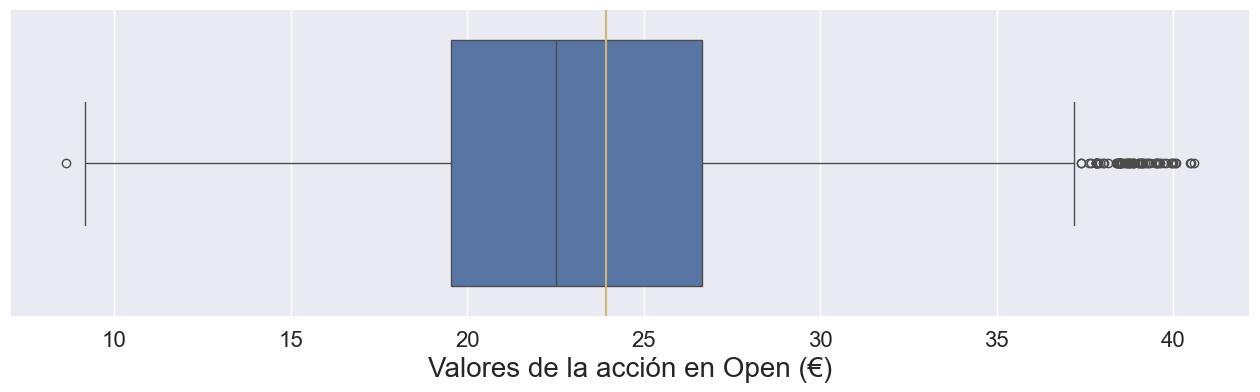

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")
plt.figure(figsize=(16, 4))
plt.xticks(fontsize=16)
plt.xlabel('Valores de la acción en Open (€)', fontsize=20)
sns.boxplot(x= dataset_empresa['Open'])
plt.axvline(dataset_empresa['Open'].mean(), c= 'y')

Se muestra a continuación las métricas para las cotizaciones del precios de Close entre 2019-2024:

In [77]:
minimo_close = dataset_empresa['Close'].min()
maximo_close = dataset_empresa['Close'].max()
media_close = dataset_empresa['Close'].mean()
mediana_close = dataset_empresa['Close'].median()
moda_close = dataset_empresa['Close'].mode().iloc[0]
desviacion_close= dataset_empresa['Close'].std()
rango_intercuartilico_close = dataset_empresa['Close'].quantile(0.75) - dataset_empresa['Close'].quantile(0.25)
percentil_q1_close = dataset_empresa['Close'].quantile(0.25)
percentil_q3_close = dataset_empresa['Close'].quantile(0.75)

print(f"Precio minimo de Close: {minimo_close.round(3)} €")
print(f"Precio máximo de Close: {maximo_close.round(3)} €")
print(f"Media de Close: {media_close.round(3)} €")
print(f"Mediana de Close: {mediana_close.round(3)} €")
print(f"Moda de Close: {moda_close.round(3)} €")
print(f"Desviación estándar de Close: {desviacion_close.round(2)} %")
print(f"Rango intercuartílico de Close: {rango_intercuartilico_close.round(3)} €")
print(f"Percentil Q1 de Close: {percentil_q1_close.round(3)} €")
print(f"Percentil Q3 de Close: {percentil_q3_close.round(3)} €")

Precio minimo de Close: 8.338 €
Precio máximo de Close: 40.59 €
Media de Close: 23.932 €
Mediana de Close: 22.5 €
Moda de Close: 20.98 €
Desviación estándar de Close: 6.05 %
Rango intercuartílico de Close: 7.093 €
Percentil Q1 de Close: 19.531 €
Percentil Q3 de Close: 26.624 €


A continuación, se expone de forma visual un gráfico con los datos de Close:

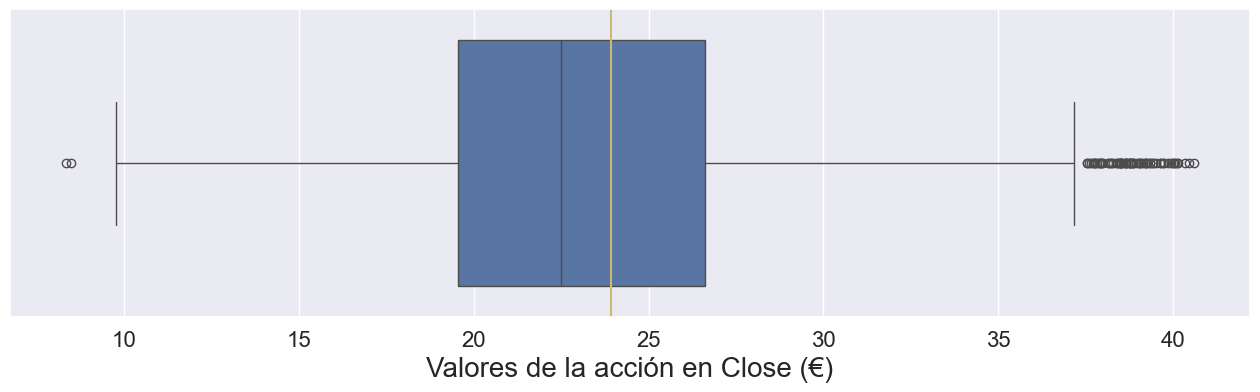

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")
plt.figure(figsize=(16, 4))
plt.xticks(fontsize=16)
plt.xlabel('Valores de la acción en Close (€)', fontsize=20)
sns.boxplot(x= dataset_empresa['Close'])
plt.axvline(dataset_empresa['Close'].mean(), c= 'y')

Los datos proporcionados sobre los precios de apertura (Open) y de cierre (Close) son muy similares en las acciones de ACS entre 2019 y 2023. Estos datos sugieren una distribución sesgada hacia valores más bajos. Veamos cómo se interpretan estos datos:

- Moda y Medias bajas: La moda (valor más frecuente) y las medias (media aritmética) son relativamente bajas en comparación con las medianas (valor central). Esto indica que hay una concentración de precios más bajos en la distribución.
- Desviación Eestándar y Rango Intercuartílico (IQR): La alta desviación estándar sugiere una variabilidad significativa en los precios de apertura. Además, el amplio rango intercuartílico (diferencia entre Q3 y Q1) indica que ha habido cambios sustanciales en los precios a lo largo del período.
- Eventos atípicos o condiciones del mercado: La variabilidad observada podría deberse a eventos atípicos o condiciones del mercado. Por ejemplo, noticias económicas, decisiones corporativas o factores macroeconómicos podrían haber influido en los precios.

### 3.2.2- Conceptos estadisticos en el analisis de datos de Close de la empresa entre 2019 y 2024

A continuación, se mostrará los siguientes 4 conceptos:
- Frecuencia
- Densidad
- Asimetría
- Curtosis

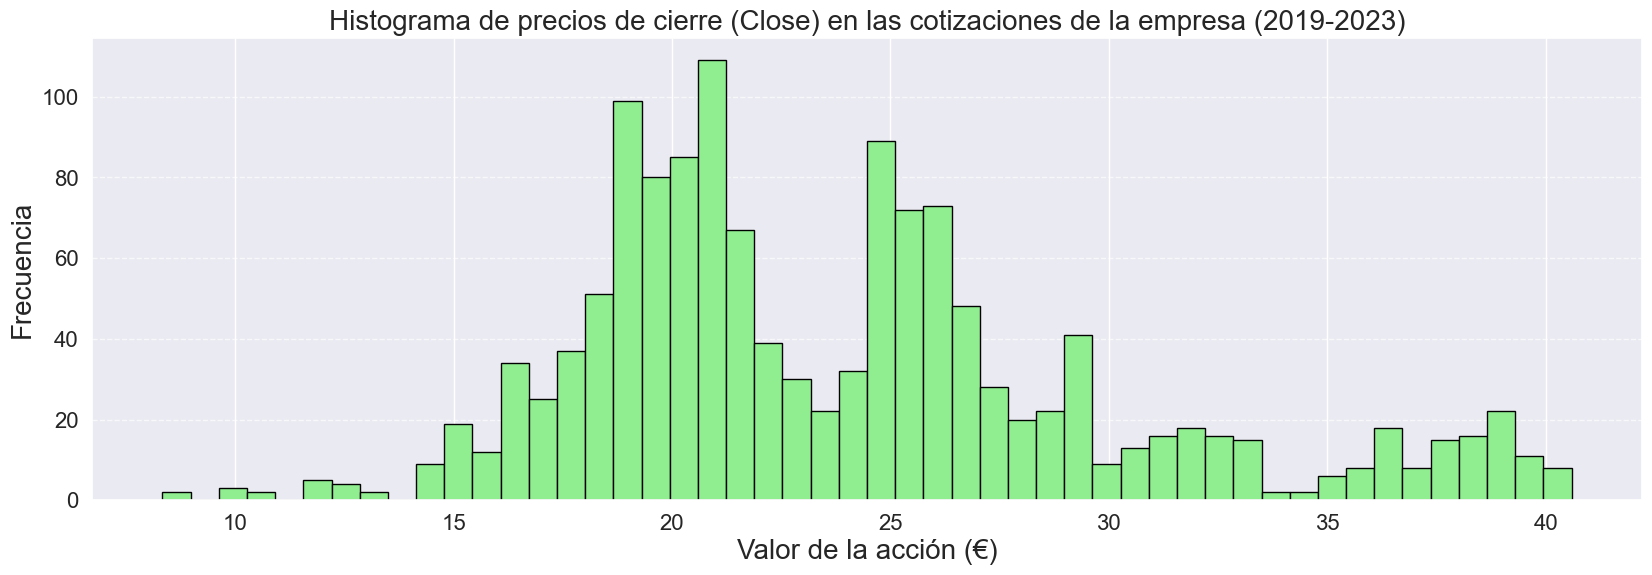

In [79]:
import plotly

plt.figure(figsize=(20, 6))

dataset_empresa['Close'].plot(kind='hist', bins=50, color='lightgreen', edgecolor='black')
plt.title('Histograma de precios de cierre (Close) en las cotizaciones de la empresa (2019-2023)', fontsize=20)
plt.xlabel('Valor de la acción (€)', fontsize=20)
plt.ylabel('Frecuencia', fontsize=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

La frecuencia en el eje y indica cuántas veces los precios de cierre de las acciones (variable “Close”) caen dentro de cada uno de los intervalos definidos por los bins. Por ejemplo, si tienes un bin que abarca el rango de 50 a 60 euros, la frecuencia en ese bin mostrará cuántas veces los precios de cierre se encuentran en ese rango.

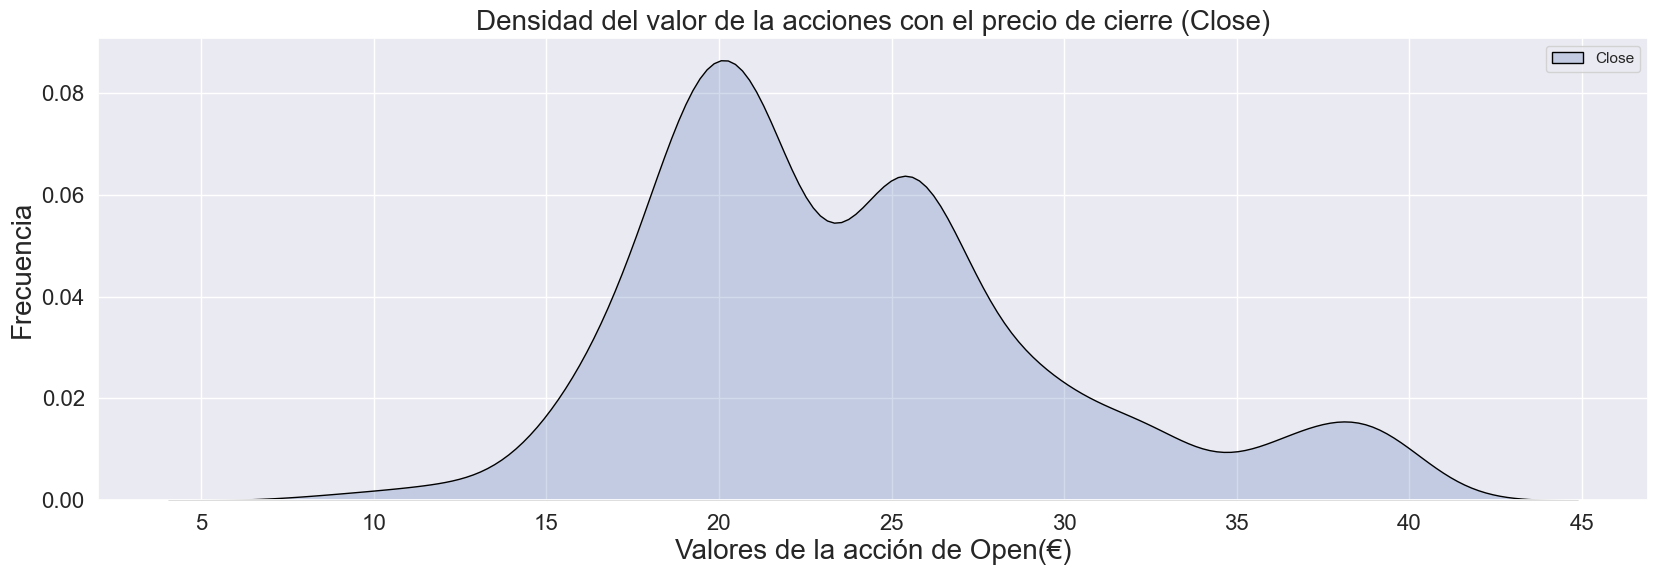

In [80]:
plt.figure(figsize=(20, 6))
sns.kdeplot(dataset_empresa['Close'], fill=True, label='Close', edgecolor='black')
plt.title('Densidad del valor de la acciones con el precio de cierre (Close)', fontsize=20)
plt.legend()
plt.xlabel('Valores de la acción de Open(€)', fontsize=20)
plt.ylabel('Frecuencia', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

La densidad o density en el eje y, indica la concentración de valores de la variable “Close” (precio de cierre) en diferentes rangos. Cuanto más alta sea la densidad en un punto particular del eje y, mayor será la probabilidad de que los valores de “Close” se encuentren en ese rango.

In [81]:
from scipy.stats import skew, kurtosis

skew_cls = skew(dataset_empresa['Close']).round(3)
kurt_cls = kurtosis(dataset_empresa['Close']).round(3)

print('Asimetría (Skewness) en Close',skew_cls)
print('Curtosis (Kurtosis) en Close:',kurt_cls)

Asimetría (Skewness) en Close 0.803
Curtosis (Kurtosis) en Close: 0.349


La asimetría mide la simetría de la distribución. Un valor de asimetría de 0.532 indica que la distribución de los precios de cierre de las acciones tiene una ligera inclinación hacia la derecha, lo que significa que hay una mayor cantidad de valores menores que la media.

La curtosis mide la “pesadez” de las colas de la distribución. Un valor de curtosis de 0.363 indica que la distribución tiene colas ligeramente más pesadas que una distribución normal (curtosis = 0), lo que significa que hay una mayor probabilidad de obtener valores extremos.

Estos valores pueden ser útiles para entender el comportamiento de los precios de cierre de las acciones y para hacer predicciones sobre su comportamiento futuro. Sin embargo, siempre es importante tener en cuenta que estas son solo medidas estadísticas y no garantizan un comportamiento específico en el futuro. Si tienes alguna otra pregunta o necesitas más ayuda, no dudes en preguntar.

### 3.2.3- Analisis multivariables de las cotizaciones de la empresa

Con el fin de realizar los análisis multivariables, primero agruparemos por años y meses y días las fechas en nuevas columnas en un dataset paralelo al troncal:

In [82]:
prices_dates = dataset_empresa

prices_dates['Year'] = prices_dates['Date'].dt.year
prices_dates['Month'] = prices_dates['Date'].dt.month
prices_dates['Day'] = prices_dates['Date'].dt.day
prices_dates

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Month,Day
0,2019-01-02,22.949238,22.949238,22.233563,22.656151,579957,0.0,0.0,2019,1,2
1,2019-01-03,22.424411,22.921972,22.356252,22.710680,826120,0.0,0.0,2019,1,3
2,2019-01-04,22.969682,23.167346,22.881075,23.051474,962645,0.0,0.0,2019,1,4
3,2019-01-07,23.242326,23.378644,22.921976,23.126453,1501743,0.0,0.0,2019,1,7
4,2019-01-08,23.119633,23.603565,23.065107,23.365009,1264760,0.0,0.0,2019,1,8
...,...,...,...,...,...,...,...,...,...,...,...
1359,2024-04-23,38.500000,38.900002,38.459999,38.480000,391787,0.0,0.0,2024,4,23
1360,2024-04-24,38.520000,38.700001,38.220001,38.360001,732447,0.0,0.0,2024,4,24
1361,2024-04-25,38.480000,38.480000,37.360001,37.700001,503456,0.0,0.0,2024,4,25
1362,2024-04-26,38.040001,38.080002,37.700001,37.820000,522897,0.0,0.0,2024,4,26


En los siguientes dos gráficos, se va a proceder a mostrar los promedios de los precios de cierre (Close) divididos en años y meses:

Gráfico 1: Por años, en forma de histograma de barras

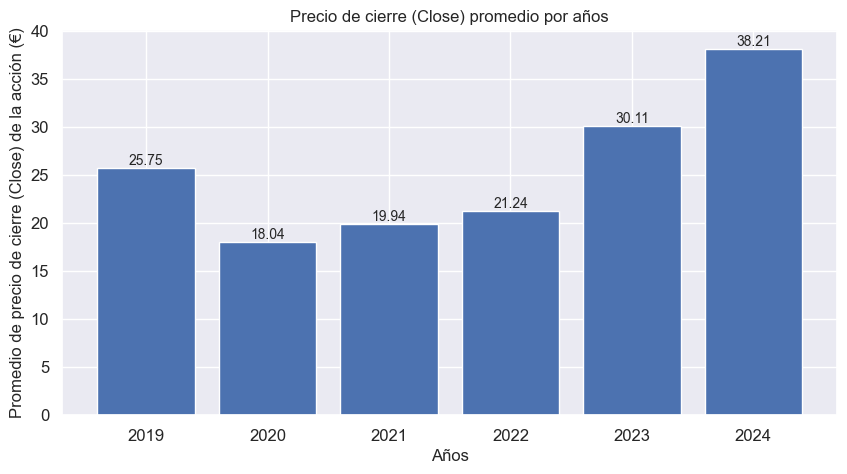

In [83]:
avg_year = prices_dates.groupby(['Year'])['Close'].mean().reset_index()

# Crear un gráfico de barras con etiquetas de precio
plt.figure(figsize=(10, 5))
bars = plt.bar(avg_year['Year'], avg_year['Close'])
plt.title('Precio de cierre (Close) promedio por años')
plt.xlabel('Años')
plt.ylabel('Promedio de precio de cierre (Close) de la acción (€)')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Agregar etiquetas de precio encima de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.show()

Con un boxplot...

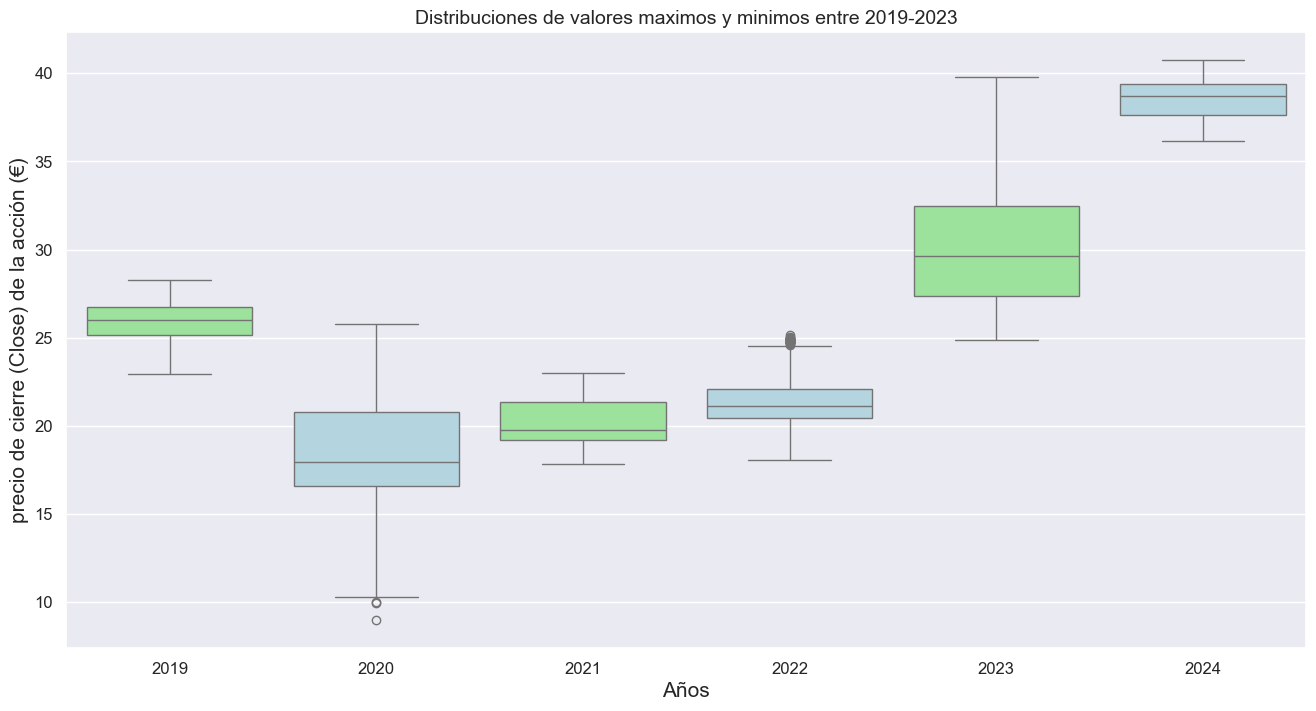

In [84]:
avg_year_boxplot = prices_dates.groupby(['Year'])['High']

plt.figure(figsize=(16, 8))
sns.boxplot(data=prices_dates, x='Year', y='High', hue='Year', palette=['lightgreen', 'lightblue'], dodge=False)
plt.legend([],[], frameon=False)
plt.title('Distribuciones de valores maximos y minimos entre 2019-2023', fontsize=14)
plt.xlabel('Años', fontsize=15)
plt.ylabel('precio de cierre (Close) de la acción (€)', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

Gráfico 2: Por meses, en forma de gráfico de líneas interactivo

In [85]:
import plotly.graph_objs as go

avg_month = prices_dates.groupby(['Year', 'Month'])['Close'].mean().reset_index()

fig = go.Figure()

for year in avg_month['Year'].unique():
    year_data = avg_month[avg_month['Year'] == year]
    fig.add_trace(go.Scatter(
                                x=year_data['Month'],
                                y=year_data['Close'],
                                mode='lines+markers',
                                name=str(year)
                            ))

fig.update_layout(
    title='Promedio de Precios de Cierre por Meses (Agrupados por Años)',
    xaxis=dict(title='Meses'),
    yaxis=dict(title='Promedio de Precio de Cierre (€)'),
    xaxis_tickvals=list(range(1, 13)),
    xaxis_ticktext=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
)

fig.show()

### 3.2.4- Analisis de correlaciones

In [86]:
dataset_empresa.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Month,Day
0,2019-01-02,22.949238,22.949238,22.233563,22.656151,579957,0.0,0.0,2019,1,2
1,2019-01-03,22.424411,22.921972,22.356252,22.710680,826120,0.0,0.0,2019,1,3
2,2019-01-04,22.969682,23.167346,22.881075,23.051474,962645,0.0,0.0,2019,1,4
3,2019-01-07,23.242326,23.378644,22.921976,23.126453,1501743,0.0,0.0,2019,1,7
4,2019-01-08,23.119633,23.603565,23.065107,23.365009,1264760,0.0,0.0,2019,1,8


A continuación, se va a proceder a elaborar una matriz de correlaciones. En esta matriz, se tendrá en cuenta las columnas del dataset de la empresa a analizar.

Para esta matriz, vamos a quitar las columnas de Year, Month y Day. Ya que teníamos ya la de Date.

Por otra parte, al no existir datos dentro de Stock Splits, quitamos también esta columna.

In [87]:

df_filtered = dataset_empresa.drop(columns=['Year', 'Month', 'Day', 'Stock Splits'])
#Tabla de correlaciones
df_filtered.corr()

,Date,Open,High,Low,Close,Volume,Dividends
Date,1.000000,0.504766,0.504999,0.507024,0.507693,-0.239698,-0.007372
Open,0.504766,1.000000,0.999220,0.998974,0.998088,-0.331514,-0.006221
High,0.504999,0.999220,1.000000,0.998844,0.999097,-0.324702,-0.006998
Low,0.507024,0.998974,0.998844,1.000000,0.999184,-0.343494,-0.006694
Close,0.507693,0.998088,0.999097,0.999184,1.000000,-0.335098,-0.007639
Volume,-0.239698,-0.331514,-0.324702,-0.343494,-0.335098,1.000000,0.005539
Dividends,-0.007372,-0.006221,-0.006998,-0.006694,-0.007639,0.005539,1.000000


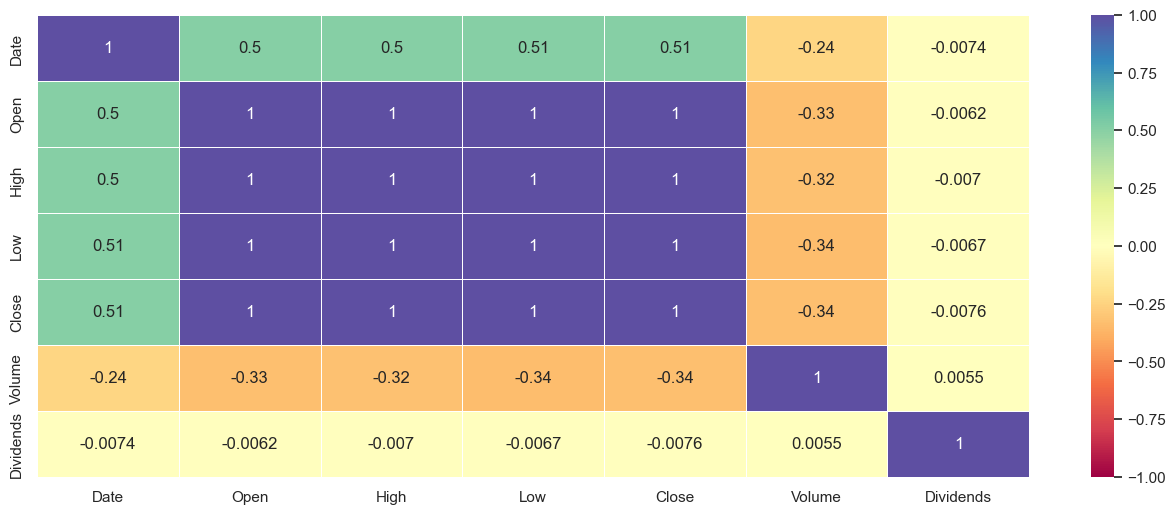

In [88]:
plt.figure(figsize=(16, 6))
ax = sns.heatmap(df_filtered.corr(), vmin=-1, vmax=1, annot=True, cmap="Spectral", linewidths=.5);

## 3.3- Variaciones importantes de precios dentro de los años 2019-2024 de la empresa a analizar

A lo largo del período 2019-2023, las acciones de la empresa a analizar han debido de tener fluctuaciones con una mayor o menor volatilidad. Gracias a la exposición de estos datos, podemos identificar fechas clave en las que han podido suceder eventos o acontecimientos que hayan provocado una mayor volatilidad en los precios de las acciones.

A través de esta sección, van a identificarse:

1- Las variaciones porcentuales más altas en positivo en el precio de cierre de un día respecto al anterior. 
Se tendrá en cuenta la variación porcentual más alta por cada mes de cada año.

2- Las variaciones porcentuales más altas en positivo en el precio de cierre de un día respecto al anterior. 
Se tendrá en cuenta 5 días de cada año, los cuales han tenido las 5 mayores variaciones más altas en cada año.

3- Las variaciones porcentuales más altas en negativo en el precio de cierre de un día respecto al anterior. 
Se tendrá en cuenta la variación porcentual más alta en negativo por cada mes de cada año.

4- Las variaciones porcentuales más altas en negativo en el precio de cierre de un día respecto al anterior. 
Se tendrá en cuenta 5 días de cada año, los cuales han tenido las 5 mayores variaciones más altas en cada año.

Antes que nada, vamos a proceder a generar una nueva columna, la cual mostrará la variación porcentual del precio de cierre (Close) de un día respecto al día anterior. Esta variación porcentual se muestra ya en forma porcentual, en otras palabras, cada número de var_close está expresado en porcentaje con dos decimales.

In [89]:
dataset_empresa['var_close'] = (dataset_empresa['Close'].pct_change() * 100).round(2)
dataset_empresa.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Month,Day,var_close
0,2019-01-02,22.949238,22.949238,22.233563,22.656151,579957,0.0,0.0,2019,1,2,NaN
1,2019-01-03,22.424411,22.921972,22.356252,22.710680,826120,0.0,0.0,2019,1,3,0.24
2,2019-01-04,22.969682,23.167346,22.881075,23.051474,962645,0.0,0.0,2019,1,4,1.50
3,2019-01-07,23.242326,23.378644,22.921976,23.126453,1501743,0.0,0.0,2019,1,7,0.33
4,2019-01-08,23.119633,23.603565,23.065107,23.365009,1264760,0.0,0.0,2019,1,8,1.03


Tenemos un NaN en la primera fila, puesto que no puede coger datos del día anterior. Lo sustituimos por 0.

In [90]:
dataset_empresa['var_close'].fillna(0, inplace=True)
dataset_empresa.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Month,Day,var_close
0,2019-01-02,22.949238,22.949238,22.233563,22.656151,579957,0.0,0.0,2019,1,2,0.00
1,2019-01-03,22.424411,22.921972,22.356252,22.710680,826120,0.0,0.0,2019,1,3,0.24
2,2019-01-04,22.969682,23.167346,22.881075,23.051474,962645,0.0,0.0,2019,1,4,1.50
3,2019-01-07,23.242326,23.378644,22.921976,23.126453,1501743,0.0,0.0,2019,1,7,0.33
4,2019-01-08,23.119633,23.603565,23.065107,23.365009,1264760,0.0,0.0,2019,1,8,1.03


In [91]:
dataset_empresa['Year'] = dataset_empresa['Date'].dt.year

### 3.3.1- Mayores incrementos de precio de cierre por mes de cada año

Se muestra dentro de las variaciones porcentuales de var_close, los mayores incrementos que ha habido en un día respecto al anterior por mes de cada año.

In [92]:
mayor_var_close_mes_positivo = dataset_empresa.groupby(['Year','Month'])['var_close'].max().reset_index()
mayor_var_close_mes_positivo

,Year,Month,var_close
0,2019,1,2.53
1,2019,2,1.85
2,2019,3,2.28
3,2019,4,2.69
4,2019,5,1.62
...,...,...,...
59,2023,12,2.87
60,2024,1,1.76
61,2024,2,1.60
62,2024,3,2.28


Se muestra de forma gráfica estos valores:

In [93]:
import plotly.express as px

fig = px.treemap(mayor_var_close_mes_positivo, path=['Year', 'Month', 'var_close'], values='var_close')
fig.update_layout(
    title='Variaciones de precio de cierre máximas en positivo por año y mes entre 2019-2024',
    title_font=dict(size=19)
)
fig.show()

### 3.3.2- Mayores 5 incrementos de precio de cierre de cada año

In [94]:
highest_var_close = dataset_empresa.groupby('Year')['var_close'].nlargest(5)
highest_var_close

Year      
2019  133      3.19
      199      3.11
      153      3.09
      176      2.92
      71       2.69
2020  449     25.85
      312     16.86
      315     11.45
      475     10.25
      356      9.70
2021  730      4.72
      553      4.42
      691      4.00
      653      3.68
      519      3.55
2022  816      4.61
      815      4.37
      811      4.14
      916      3.63
      808      3.26
2023  1064     3.85
      1170     3.17
      1270     2.87
      1222     2.78
      1077     2.54
2024  1332     2.28
      1294     1.76
      1328     1.69
      1325     1.64
      1337     1.64
Name: var_close, dtype: float64

Se muestra los 5 mayores incrementos de precio de cierre (€) en positivo en cada año.

A continuación se muestran las variaciones en su respectiva fecha, junto con el precio de cierre (€) al que se encontraba en ese momento.

In [95]:
highest_df = dataset_empresa.loc[highest_var_close.index.get_level_values(1)][['Date', 'Close', 'var_close']]
highest_df.set_index('Date', inplace=True)
highest_df.sort_index(inplace=True)
highest_df

,Close,var_close
Date,,
2019-04-11,27.978661,2.69
2019-07-11,27.427443,3.19
2019-08-08,25.179529,3.09
2019-09-10,26.098804,2.92
2019-10-11,25.991079,3.11
2020-03-20,9.744021,16.86
2020-03-25,11.772962,11.45
2020-05-26,17.542883,9.70
2020-10-02,18.262642,25.85


### 3.3.3- Mayores disminuciones de precio de cierre por mes de cada año

In [96]:
mayor_var_close_mes_negativo = dataset_empresa.groupby(['Year','Month'])['var_close'].min().reset_index()
mayor_var_close_mes_negativo

,Year,Month,var_close
0,2019,1,-1.44
1,2019,2,-1.70
2,2019,3,-2.44
3,2019,4,-1.59
4,2019,5,-3.51
...,...,...,...
59,2023,12,-1.21
60,2024,1,-9.99
61,2024,2,-1.46
62,2024,3,-3.15


In [97]:
# Creamos una nueva columna con el valor absoluto de la variación de precio de cierre
mayor_var_close_mes_negativo['Abs var_close'] = mayor_var_close_mes_negativo['var_close'].abs()

Se muestra ahora de forma gráfica estos valores en términos absolutos:

In [98]:
fig = px.treemap(mayor_var_close_mes_negativo, path=['Year', 'Month', 'Abs var_close'], values='Abs var_close')
fig.update_layout(
    title='Variaciones de precio de cierre máximas en negativo por año y mes entre 2019-2024',
    title_font=dict(size=19)
)
fig.show()

### 3.3.4- Mayores 5 incrementos en negativo de precio de cierre de cada año

In [99]:
lowest_var_close = dataset_empresa.groupby('Year')['var_close'].nsmallest(5)
lowest_var_close

Year      
2019  192     -4.20
      138     -4.17
      146     -3.99
      150     -3.88
      222     -3.82
2020  306    -18.87
      310    -14.68
      308    -14.34
      440    -10.23
      303    -10.01
2021  745     -6.16
      526     -4.26
      587     -4.15
      540     -3.29
      651     -3.25
2022  880     -4.36
      898     -4.00
      807     -3.95
      882     -3.83
      836     -3.81
2023  1221    -3.99
      1085    -3.14
      1051    -2.54
      1078    -2.37
      1041    -2.25
2024  1300    -9.99
      1343    -3.15
      1282    -2.33
      1324    -2.13
      1361    -1.72
Name: var_close, dtype: float64

In [100]:
lowest_df = dataset_empresa.loc[lowest_var_close.index.get_level_values(1)][['Date', 'Close', 'var_close']]
lowest_df.set_index('Date', inplace=True)
lowest_df.sort_index(inplace=True)

Ahora se muestra los 5 días de cada año en los que ha habido los disminuciones más altas:

In [101]:
lowest_df

,Close,var_close
Date,,
2019-07-18,26.256807,-4.17
2019-07-30,25.919262,-3.99
2019-08-05,24.569075,-3.88
2019-10-02,24.899439,-4.20
2019-11-13,24.597797,-3.82
2020-03-09,16.180540,-10.01
2020-03-12,12.057086,-18.87
2020-03-16,10.355983,-14.34
2020-03-18,8.469103,-14.68


# 4- Analisis de rentabilidad de acciones y exposicion de dividendos

## 4.1- Analisis de rentabilidad de acciones de la empresa por año

### 4.1.1- Ejemplo de la variacion porcentual en el Close que ha habido de una fecha inicial respecto a otra fecha final

Antes de analiazar la rentabilidad de las acciones por cada año, vamos a poner un ejemplo de variación porcentual en el Close que ha habido de una fecha inicial respecto a otra fecha final.

In [102]:
dataset_empresa.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Month,Day,var_close
0,2019-01-02,22.949238,22.949238,22.233563,22.656151,579957,0.0,0.0,2019,1,2,0.00
1,2019-01-03,22.424411,22.921972,22.356252,22.710680,826120,0.0,0.0,2019,1,3,0.24
2,2019-01-04,22.969682,23.167346,22.881075,23.051474,962645,0.0,0.0,2019,1,4,1.50
3,2019-01-07,23.242326,23.378644,22.921976,23.126453,1501743,0.0,0.0,2019,1,7,0.33
4,2019-01-08,23.119633,23.603565,23.065107,23.365009,1264760,0.0,0.0,2019,1,8,1.03


In [103]:
fecha_inicio = "2019-01-02" #podemos especificar otra fecha inicial
fecha_final = "2019-01-08"  #podemos especificar otra fecha final

valor_inicial = dataset_empresa.loc[dataset_empresa["Date"] == fecha_inicio, "Close"].values[0]
valor_final = dataset_empresa.loc[dataset_empresa["Date"] == fecha_final, "Close"].values[0]

In [104]:
valor_inicial.round(3)
print("El valor inicial de Close correspondiente a la fecha inicial con 3 decimales es:", valor_inicial.round(3), "€")

El valor inicial de Close correspondiente a la fecha inicial con 3 decimales es: 22.656 €


In [105]:
valor_final.round(3)
print("El valor inicial de Close correspondiente a la fecha final con 3 decimales es:", valor_final.round(3), "€")

El valor inicial de Close correspondiente a la fecha final con 3 decimales es: 23.365 €


In [106]:
variacion_porcentual = ((valor_final - valor_inicial) / valor_inicial) * 100
print("La variación porcentual entre el Close de entre el Close inicial y el Close final es:", variacion_porcentual.round(3), "%")

La variación porcentual entre el Close de entre el Close inicial y el Close final es: 3.129 %


El resultado de 3.129 %, nos indica que el precio de la acción ha tenido un rendimiento o rentabilidad positiva del 3,129 % en ese intervalo temporal. De nuevo, esto ha servido como ejemplo.

### 4.1.2- Rentabilidad de acciones de la empresa en cada mes de cada año

En esta sección, se va a proceder a conseguir la variacion porcentual que ha habido en el precio de cierre (Close) entre el primer día de cada mes y el último día de cada mes, por cada año (2019-2023).

Antes que nada, vamos a crear una variable paralela a dataset_empresa para poder realizar esta sección:

In [107]:
dataset_para_rentabilidad = dataset_empresa
dataset_para_rentabilidad

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Month,Day,var_close
0,2019-01-02,22.949238,22.949238,22.233563,22.656151,579957,0.0,0.0,2019,1,2,0.00
1,2019-01-03,22.424411,22.921972,22.356252,22.710680,826120,0.0,0.0,2019,1,3,0.24
2,2019-01-04,22.969682,23.167346,22.881075,23.051474,962645,0.0,0.0,2019,1,4,1.50
3,2019-01-07,23.242326,23.378644,22.921976,23.126453,1501743,0.0,0.0,2019,1,7,0.33
4,2019-01-08,23.119633,23.603565,23.065107,23.365009,1264760,0.0,0.0,2019,1,8,1.03
...,...,...,...,...,...,...,...,...,...,...,...,...
1359,2024-04-23,38.500000,38.900002,38.459999,38.480000,391787,0.0,0.0,2024,4,23,0.05
1360,2024-04-24,38.520000,38.700001,38.220001,38.360001,732447,0.0,0.0,2024,4,24,-0.31
1361,2024-04-25,38.480000,38.480000,37.360001,37.700001,503456,0.0,0.0,2024,4,25,-1.72
1362,2024-04-26,38.040001,38.080002,37.700001,37.820000,522897,0.0,0.0,2024,4,26,0.32


In [108]:
monthly_close = dataset_para_rentabilidad.groupby(['Year', 'Month'])['Close'].agg(['first', 'last'])

# Calcular la variación porcentual
monthly_close['Variation'] = (monthly_close['last'] - monthly_close['first']) / monthly_close['first'] * 100
monthly_close['Variation'] = monthly_close['Variation'].round(2)
monthly_close

first       last  Variation
Year Month                                 
2019 1      22.656151  24.926693      10.02
     2      25.064791  26.915304       7.38
     3      27.440077  27.039595      -1.46
     4      27.067215  28.261761       4.41
     5      27.916512  25.479088      -8.73
...               ...        ...        ...
2023 12     36.197319  39.235744       8.39
2024 1      39.421371  36.590000      -7.18
     2      36.610001  37.939999       3.63
     3      37.130001  38.779999       4.44
     4      38.480000  37.980000      -1.30

[64 rows x 3 columns]

Ahora, se va a proceder a mostrar los resultados en forma de gráfico de líneas interactivo:

In [109]:
traces = []
for year in monthly_close.index.get_level_values('Year').unique():
    df_year = monthly_close.loc[year]
    trace = go.Scatter(
        x=df_year.index.get_level_values('Month'),
        y=df_year['Variation'],
        mode='lines+markers',
        name=str(year)
    )
    traces.append(trace)

# Diseñar el diseño del gráfico
layout = go.Layout(
    title='Variación porcentual mensual en el precio de cierre (Close) entre 2019 y 2024',
    xaxis=dict(
        title='Mes',
        tickvals=list(range(1, 13)),  # Valores de los meses (1 a 12)
        ticktext=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']  # Etiquetas de los meses
    ),
    yaxis=dict(title='Variación (%)')
)

# Crear la figura
fig = go.Figure(data=traces, layout=layout)

# Mostrar el gráfico interactivo
fig.show()

## 4.2- Analisis de dividendos de acciones de la empresa por año

Primero, pongo como ejemplo los dividendos, que ha habido de una fecha inicial respecto a otra fecha final.

Antes que nada, vamos a crear una variable paralela a dataset_empresa para poder realizar esta sección:

In [110]:
dividendos_empresa = ACS_dataset
dividendos_empresa

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Month,Day,var_close
0,2019-01-02,22.949238,22.949238,22.233563,22.656151,579957,0.0,0.0,2019,1,2,0.00
1,2019-01-03,22.424411,22.921972,22.356252,22.710680,826120,0.0,0.0,2019,1,3,0.24
2,2019-01-04,22.969682,23.167346,22.881075,23.051474,962645,0.0,0.0,2019,1,4,1.50
3,2019-01-07,23.242326,23.378644,22.921976,23.126453,1501743,0.0,0.0,2019,1,7,0.33
4,2019-01-08,23.119633,23.603565,23.065107,23.365009,1264760,0.0,0.0,2019,1,8,1.03
...,...,...,...,...,...,...,...,...,...,...,...,...
1359,2024-04-23,38.500000,38.900002,38.459999,38.480000,391787,0.0,0.0,2024,4,23,0.05
1360,2024-04-24,38.520000,38.700001,38.220001,38.360001,732447,0.0,0.0,2024,4,24,-0.31
1361,2024-04-25,38.480000,38.480000,37.360001,37.700001,503456,0.0,0.0,2024,4,25,-1.72
1362,2024-04-26,38.040001,38.080002,37.700001,37.820000,522897,0.0,0.0,2024,4,26,0.32


In [111]:
dividendos_empresa = dividendos_empresa[dividendos_empresa['Dividends'] > 0]

tabla_dividendos = dividendos_empresa[['Date', 'Close', 'Dividends']]
tabla_dividendos = tabla_dividendos.reset_index(drop=True)
tabla_dividendos

,Date,Close,Dividends
0,2019-01-22,24.546923,0.450
1,2019-06-24,26.084438,1.450
2,2020-02-18,22.664412,0.449
3,2020-06-23,17.744349,1.380
4,2020-07-02,18.317226,0.160
5,2021-01-22,21.408579,0.452
6,2021-06-22,19.202978,1.270
7,2022-01-14,20.475348,0.468
8,2022-07-01,19.705980,1.484
9,2022-08-02,21.121965,0.050


In [112]:
tabla_dividendos['Proportion'] = (tabla_dividendos['Dividends'] / tabla_dividendos['Close']) * 100
tabla_dividendos['Proportion'] = tabla_dividendos['Proportion'].round(3)
tabla_dividendos

,Date,Close,Dividends,Proportion
0,2019-01-22,24.546923,0.450,1.833
1,2019-06-24,26.084438,1.450,5.559
2,2020-02-18,22.664412,0.449,1.981
3,2020-06-23,17.744349,1.380,7.777
4,2020-07-02,18.317226,0.160,0.873
5,2021-01-22,21.408579,0.452,2.111
6,2021-06-22,19.202978,1.270,6.614
7,2022-01-14,20.475348,0.468,2.286
8,2022-07-01,19.705980,1.484,7.531
9,2022-08-02,21.121965,0.050,0.237


Ahora, se mostrará de forma gráfica estos datos:

In [115]:
fig = px.scatter(tabla_dividendos, x='Date', y='Dividends', text='Proportion',
                 title='Dividendos emitidos por acción entre 2019-2024, junto a la proporcion respecto al Close',
                 labels={'Dividends': 'Dividends',
                          'Proportion': 'Proportion (%)',})

fig.update_traces(textposition='top center', marker=dict(size=10, color='blue'), showlegend=False)
# Agregar día, mes y año en cada punto
fig.update_traces(texttemplate='%{text}<br>%{x|%d-%m-%Y}')

fig.update_xaxes(title_text='Fechas')
fig.update_yaxes(title_text='Importe de Dividendo (€)')

fig.show()